In [4]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split    # 训练集、测试集划分
from sklearn.linear_model import LogisticRegressionCV   # 交叉验证的逻辑回归模块
from sklearn.preprocessing import StandardScaler

In [8]:
# 读取数据
path = './datas/breast-cancer-wisconsin.data'  
names = ['id','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape',
         'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei',
        'Bland Chromatin','Normal Nucleoli','Mitoses','Class']

df = pd.read_csv(path, header=None, names=names)
df.shape

(699, 11)

In [18]:
# 数据预处理，去除异常值，删除空值
datas = df.replace('?', np.nan).dropna(how='any')
datas.shape

(683, 11)

In [21]:
# 提取数据，id无意义
X = datas[names[1:10]]
Y = datas[names[10]]

# 划分测试集和训练集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [22]:
# 数据标准化处理
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [23]:
# 3. 模型构建及训练
# penalty: 过拟合解决参数,l1或者l2
## solver: 参数优化方式
# 当penalty为l1的时候，参数只能是：liblinear(坐标轴下降法)；
# nlbfgs和cg都是关于目标函数的二阶泰勒展开
# 当penalty为l2的时候，参数可以是：lbfgs(拟牛顿法)、newton-cg(牛顿法变种)，seg(minibatch)
# 维度<10000时，lbfgs法比较好，   维度>10000时， cg法比较好，显卡计算的时候，lbfgs和cg都比seg快
# multi_class: 分类方式参数；参数可选: ovr(默认)、multinomial；这两种方式在二元分类问题中，效果是一样的；在多元分类问题中，效果不一样
# ovr: one-vs-rest， 对于多元分类的问题，先将其看做二元分类，分类完成后，再迭代对其中一类继续进行二元分类
# multinomial: many-vs-many（MVM）,即Softmax分类效果
## class_weight: 特征权重参数

# TODO: Logistic回归是一种分类算法，不能应用于回归中(也即是说对于传入模型的y值来讲，不能是float类型，必须是int类型)

# 创建模型对象
lr = LogisticRegressionCV(
    multi_class='ovr', fit_intercept=True, Cs=np.logspace(-2, 2, 20),
    cv=2, penalty='l2', solver='lbfgs', tol=0.01)
re = lr.fit(X_train, Y_train)  # 训练模型

In [24]:
# 4. 模型效果获取
r = re.score(X_train, Y_train)
print ("R值（准确率）：", r)
print ("稀疏化特征比率：%.2f%%" % (np.mean(lr.coef_.ravel() == 0) * 100))
print ("参数：",re.coef_)
print ("截距：",re.intercept_)
print(re.predict_proba(X_test)) # 获取sigmoid函数返回的概率值

R值（准确率）： 0.9652014652014652
稀疏化特征比率：0.00%
参数： [[ 1.27987356 -0.08113194  1.0277364   0.74670215 -0.08232736  1.33839791
   0.99212081  0.76553612  0.84343631]]
截距： [-1.11568147]
[[9.55024151e-01 4.49758491e-02]
 [9.96779658e-01 3.22034157e-03]
 [9.87509113e-01 1.24908868e-02]
 [1.96099509e-02 9.80390049e-01]
 [9.98559862e-01 1.44013754e-03]
 [1.60478180e-04 9.99839522e-01]
 [9.94666527e-01 5.33347276e-03]
 [9.94462106e-01 5.53789444e-03]
 [3.54646212e-04 9.99645354e-01]
 [1.38698467e-04 9.99861302e-01]
 [9.90842209e-01 9.15779126e-03]
 [9.98015661e-01 1.98433913e-03]
 [8.04072691e-04 9.99195927e-01]
 [8.40153673e-01 1.59846327e-01]
 [9.91619675e-01 8.38032466e-03]
 [1.21703206e-03 9.98782968e-01]
 [9.91222139e-01 8.77786051e-03]
 [9.25805765e-01 7.41942349e-02]
 [9.91668654e-01 8.33134644e-03]
 [9.45145143e-01 5.48548567e-02]
 [9.85247563e-01 1.47524370e-02]
 [9.98559862e-01 1.44013754e-03]
 [9.92038452e-01 7.96154836e-03]
 [4.22839459e-01 5.77160541e-01]
 [7.13322671e-02 9.28667733e-0

In [30]:
# 数据预测
Y_predict = re.predict(X_test)

In [27]:
# 设置matplotlib画图的字符集
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False

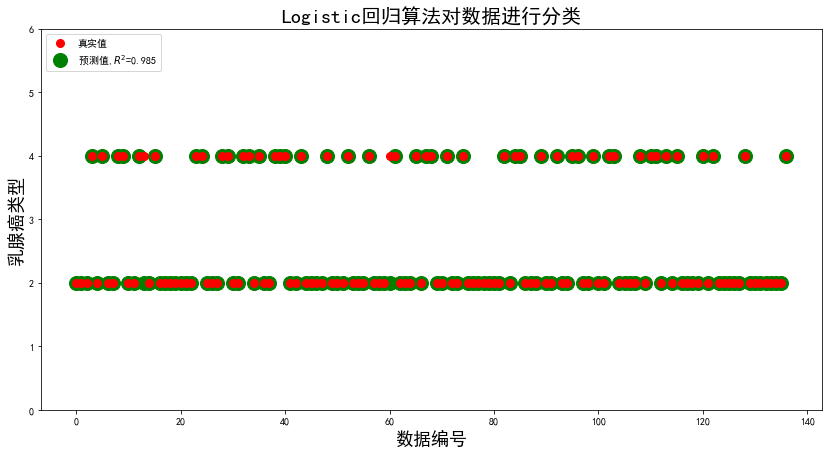

In [31]:
## c. 图表展示
x_len = range(len(X_test))
plt.figure(figsize=(14,7), facecolor='w')
plt.ylim(0,6)
plt.plot(x_len, Y_test, 'ro',markersize = 8, zorder=3, label=u'真实值')
plt.plot(x_len, Y_predict, 'go', markersize = 14, zorder=2, label=u'预测值,$R^2$=%.3f' % re.score(X_test, Y_test))
plt.legend(loc = 'upper left')
plt.xlabel(u'数据编号', fontsize=18)
plt.ylabel(u'乳腺癌类型', fontsize=18)
plt.title(u'Logistic回归算法对数据进行分类', fontsize=20)
plt.show()

In [1]:
from IPython.html.services.config import ConfigManager
ip = get_ipython()
cm = ConfigManager(parent=ip)
cm.update('notebook', {"ruler_column": [80]})

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


{'Cell': {'cm_config': {'lineNumbers': True}},
 'keys': {'command': {'unbind': ['shift-m', 'o', 'p'],
   'bind': {'n': 'jupyter-notebook:rename-notebook',
    '-': 'jupyter-notebook:move-cursor-up',
    'e': 'jupyter-notebook:clear-cell-output',
    'l': 'jupyter-notebook:move-cell-down',
    'p': 'jupyter-notebook:move-cell-up',
    '[': 'jupyter-notebook:merge-cell-with-previous-cell',
    ']': 'jupyter-notebook:merge-cell-with-next-cell',
    '\\': 'jupyter-notebook:merge-selected-cells'}}},
 'Notebook': {'Header': False, 'Toolbar': True},
 'load_extensions': {'nbextensions_configurator/config_menu/main': True,
  'contrib_nbextensions_help_item/main': True,
  'varInspector/main': True,
  'freeze/main': True,
  'code_prettify/autopep8': True,
  'highlighter/highlighter': True,
  'code_prettify/isort': False,
  'help_panel/help_panel': True,
  'codefolding/main': True,
  'nbTranslate/main': True},
 'Freeze': {'readonly_color': '#ff85ff', 'frozen_color': '#ff2600'},
 'ruler_column': [8